# Logistic Regression

Here's an attempt to fit a logistic regression model to our exisiting data! Obviously more data preprocessing etc. will make the model better, but this notebook intends to show that a model can be successfully fit to the data.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")

In [45]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_train)
imp.fit(y_train)
y_train = imp.transform(y_train)
y_test = imp.transform(y_train)

### Training the model
Here, we're training an out-of-the-box logisitic regression model to fit this data

In [78]:
model = LogisticRegression(multi_class='ovr', solver='newton-cholesky', max_iter=1000)

In [79]:
model.fit(X_train, y_train)

/Users/dylannguyen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, multi_class='ovr', solver='newton-cholesky')

In [80]:
model.score(X_test, y_test)

0.5611394163964799

In [83]:
model.score(X_train, y_train)

0.5611394163964799

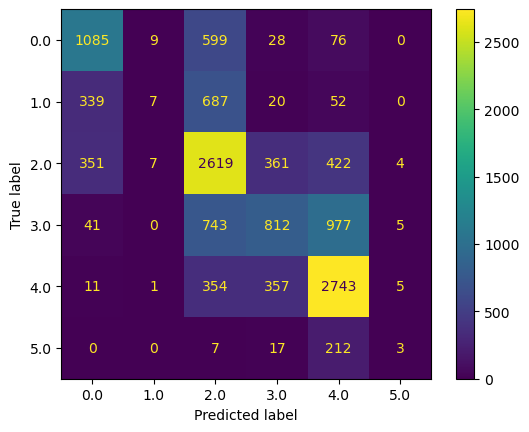

In [82]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

The model has a prediction accuracy of around 56% on both the train and test(dev) sets, which suggests a high bias. We should probably look into using more/different means of regression to bring this up!